# Source radiation patterns in elastic isotropic and VTI homogenous medium

Note: figures in an earlier version of this Notebook were used in the Geophysics paper 2023

In [2]:
import sys

pwd = !echo ${PWD}
sys.path.append(pwd[0]+"/../../../code/local/bin")

figpath=pwd[0]+"/../fig/"

In [3]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
import numpy as np
import math

import seppy

sep = seppy.sep()

rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'

# Create directories to store data and figures
!mkdir -p ../dat ../fig

datapath=pwd[0]+"/../dat/"
figpath=pwd[0]+"/../fig/"

### Vector force $\mathbf{f}w(t)$
Displacement field in the $i^{th}$-direction 
$$u_i = f_j w \ast G_{ij}, \quad \text{summation over $j$}$$
where $w$ is the source pulse, $G_{ij}$ are the elements of Green's tensor, and $\ast$ designates time convolution.

In [3]:
def force_ff_disp(f, n=101, r=1., alpha=2., beta=1., rho=1.):
    
    # meshing a sphere with radius r
    pi = math.pi
    theta, phi = np.meshgrid(np.linspace(0,pi,n) , np.linspace(0,2*pi,n) )
    x = r * np.cos(phi) * np.sin(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(theta)
    
    # calculating the far-field displacement fields
    up = np.zeros((3,n,n))
    us = np.zeros((3,n,n))
    up[0] = 1./(4*pi*rho*alpha**2)*x/r**3*(f[0]*x + f[1]*y + f[2]*z)
    up[1] = 1./(4*pi*rho*alpha**2)*y/r**3*(f[0]*x + f[1]*y + f[2]*z)
    up[2] = 1./(4*pi*rho*alpha**2)*z/r**3*(f[0]*x + f[1]*y + f[2]*z)
    us[0] = -1./(4*pi*rho*beta**2)*(f[0]*x*x + f[1]*x*y + f[2]*x*z - f[0]*r**2)/r**3;
    us[1] = -1./(4*pi*rho*beta**2)*(f[0]*y*x + f[1]*y*y + f[2]*y*z - f[1]*r**2)/r**3;
    us[2] = -1./(4*pi*rho*beta**2)*(f[0]*z*x + f[1]*z*y + f[2]*z*z - f[2]*r**2)/r**3;
    
    return up, us

def ff_rad(up,us):
    
    n=up.shape[-1]
    pi = math.pi
    theta, phi = np.meshgrid(np.linspace(0,pi,n) , np.linspace(0,2*pi,n) )
    
    rp=np.abs(up)
    rs=np.abs(us)
    
    xp=np.zeros((3,3,n,n))
    xs=np.zeros((3,3,n,n))

    xp[0] = rp*np.sin(theta)*np.cos(phi)
    xp[1] = rp*np.sin(theta)*np.sin(phi)
    xp[2] = rp*np.cos(theta)
    xs[0] = rs*np.sin(theta)*np.cos(phi)
    xs[1] = rs*np.sin(theta)*np.sin(phi)
    xs[2] = rs*np.cos(theta)
    
    return xp, xs

def get_rad(u):
    
    n=u.shape[-1]
    pi = math.pi
    theta, phi = np.meshgrid(np.linspace(0,pi,n) , np.linspace(0,2*pi,n) )
    
    r=np.abs(u)
    
    x=np.zeros((3,n,n))

    x[0] = r*np.sin(theta)*np.cos(phi)
    x[1] = r*np.sin(theta)*np.sin(phi)
    x[2] = r*np.cos(theta)
    
    return x

In [4]:
# vector forces
f1 = [1, 0, 0]
f2 = [0, 1, 0]
f3 = [0, 0, 1]

n=101

up1, us1 = force_ff_disp(f1,n)
prad1, srad1 = ff_rad(up1, us1)

up2, us2 = force_ff_disp(f2,n)
prad2, srad2 = ff_rad(up2, us2)

up3, us3 = force_ff_disp(f3,n)
prad3, srad3 = ff_rad(up3, us3)

up = [up1, up2, up3]
us = [us1, us2, us3]
prad = [prad1, prad2, prad3]
srad = [srad1, srad2, srad3]

In [ ]:
%matplotlib inline
comp=0
fig = plt.figure(figsize=(2,3),dpi=300)

for i in range(3):
    for j in range(2):
        
        if j==0:
            data = prad[i]
            datac = up[i]
        else:
            data = srad[i]
            datac = us[i]
        
        plt.subplot(3,2,i*2+j+1)

#         ax = fig.gca(projection='3d')
        ax = fig.add_subplot(3, 2, i*2+j+1, projection='3d')
        surf = ax.plot_surface(data[0][comp], data[1][comp], data[2][comp], alpha=1, facecolors = cm.jet(np.abs(datac[comp])/np.amax(np.abs(datac[comp]))), rcount=n, ccount=n)
#         ax.plot3D([1.5*np.min(data[0][comp]),1.5*np.max(data[0][comp])], [0,0], [0,0], Linewidth=5, c='y')
        ax.view_init(elev=30, azim=-60)
        plt.axis('off')

plt.tight_layout()
plt.show()

### Moment tensor source $\mathbf{M}w(t)$
Displacement field in the $n^{th}$-direction 
$$u_n = M_{ij} w \ast \partial_j G_{ni}, \quad \text{summation over $i,j$}$$

In [5]:
def mt_ff_disp(M, n=101, r=1., alpha=2., beta=1., rho=1.):
    """Old function"""
    
    # meshing a sphere with radius r
    pi = math.pi
    theta, phi = np.meshgrid(np.linspace(0,pi,n) , np.linspace(0,2*pi,n) )
    x = r * np.cos(phi) * np.sin(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(theta)
    
    # calculating the far-field displacement fields
    up = np.zeros((3,n,n))
    us = np.zeros((3,n,n))
    up[0] = 1./(4*pi*rho*alpha**3)*x/r**3*(M[0,0]*x*x + 2*M[0,1]*x*y + 2*M[0,2]*x*z + M[1,1]*y*y + 2*M[1,2]*y*z + M[2,2]*z*z)
    up[1] = 1./(4*pi*rho*alpha**3)*y/r**3*(M[0,0]*x*x + 2*M[0,1]*x*y + 2*M[0,2]*x*z + M[1,1]*y*y + 2*M[1,2]*y*z + M[2,2]*z*z)
    up[2] = 1./(4*pi*rho*alpha**3)*z/r**3*(M[0,0]*x*x + 2*M[0,1]*x*y + 2*M[0,2]*x*z + M[1,1]*y*y + 2*M[1,2]*y*z + M[2,2]*z*z)
    us[0] = -up[0]*(alpha/beta)**3 + 1./(4*pi*rho*beta**3)*(M[0,0]*x + M[0,1]*y + M[0,2]*z)/r**2
    us[1] = -up[1]*(alpha/beta)**3 + 1./(4*pi*rho*beta**3)*(M[1,0]*x + M[1,1]*y + M[1,2]*z)/r**2
    us[2] = -up[2]*(alpha/beta)**3 + 1./(4*pi*rho*beta**3)*(M[2,0]*x + M[2,1]*y + M[2,2]*z)/r**2
    
    return up, us

In [6]:
def rad_mt_iso(x,i,j,n):
    """Radiation patterns for moment tensor source in isotropic media"""

    r=float(np.linalg.norm(x))
    gam=x/r
    d=np.eye(3)

    RPnf = 3*(5*gam[n]*gam[i]*gam[j] - gam[n]*d[i,j] - gam[i]*d[n,j] - gam[j]*d[n,i])
    RPPmf = 6*gam[n]*gam[i]*gam[j] - gam[n]*d[i,j] - gam[i]*d[n,j] - gam[j]*d[n,i]
    RPSmf = -(6*gam[n]*gam[i]*gam[j] - gam[n]*d[i,j] - gam[i]*d[n,j] - 2*gam[j]*d[n,i])
    RPPff = gam[n]*gam[i]*gam[j]
    RPSff = -gam[j]*(gam[n]*gam[i]-d[n,i])

    return np.array([RPnf, RPPmf, RPSmf, RPPff, RPSff])

def rad_mt_vti1(alpha,beta,rho,delta,epsilon,gamma,x,i,j,n):
    """Radiation patterns for moment tensor source in VTI type 1 media"""

    vp0=alpha
    vs0=beta
    vp90=vp0*math.sqrt(1+2*epsilon)
    vsh90=vs0*math.sqrt(1+2*gamma)

    r=float(np.linalg.norm(x))
    R=float(np.linalg.norm(x[0:2]))
    gam=x/r
    d=np.eye(3)
    g=x/R

    Y=np.array([[0,0,1],[g[0],g[1],0],[g[1],-g[0],0]])
    Y1=np.zeros((3,3))
    Y2=np.zeros((3,3))
    Y3=np.zeros((3,3))
    
    Y1[1,0]=d[0,0]-g[0]*g[0]*(1-d[2,0])
    Y1[1,1]=d[1,0]-g[1]*g[0]*(1-d[2,0])
    Y1[2,0]=Y1[1,1]
    Y1[2,1]=-Y1[1,0]

    Y2[1,0]=d[0,1]-g[0]*g[1]*(1-d[2,1])
    Y2[1,1]=d[1,1]-g[1]*g[1]*(1-d[2,1])
    Y2[2,0]=Y2[1,1]
    Y2[2,1]=-Y2[1,0]

    Y3[1,0]=d[0,2]-g[0]*g[2]*(1-d[2,2])
    Y3[1,1]=d[1,2]-g[1]*g[2]*(1-d[2,2])
    Y3[2,0]=Y3[1,1]
    Y3[2,1]=-Y3[1,0]

    Yj = [Y1, Y2, Y3]

    u1 = gam[0]**2 + gam[1]**2 + (vs0/vp0*gam[2])**2
    u2 = gam[0]**2 + gam[1]**2 + (vp90/vs0*gam[2])**2
    u3 = gam[0]**2 + gam[1]**2 + (vsh90/vs0*gam[2])**2

    u = [u1, u2, u3]

    u1_s = (gam[0]*(d[0,j]-gam[0]*gam[j]) + gam[1]*(d[1,j]-gam[1]*gam[j]) + (vs0/vp0)**2*gam[2]*(d[2,j]-gam[2]*gam[j]) )
    u2_s = (gam[0]*(d[0,j]-gam[0]*gam[j]) + gam[1]*(d[1,j]-gam[1]*gam[j]) + (vp90/vs0)**2*gam[2]*(d[2,j]-gam[2]*gam[j]) )
    u3_s = (gam[0]*(d[0,j]-gam[0]*gam[j]) + gam[1]*(d[1,j]-gam[1]*gam[j]) + (vsh90/vs0)**2*gam[2]*(d[2,j]-gam[2]*gam[j]) )

    u_s = [u1_s, u2_s, u3_s]

    tau1=r/vs0*math.sqrt(u1)
    tau2=r/vp90*math.sqrt(u2)
    tau3=r/vsh90*math.sqrt(u3)

    tau=[tau1, tau2, tau3]

    RPns = Y[1,n]*Y[1,i]-Y[2,n]*Y[2,i]
    RP1ff = Y[0,n]*Y[0,i]/math.sqrt(u1)
    RP2ff = Y[1,n]*Y[1,i]/math.sqrt(u2)
    RP3ff = Y[2,n]*Y[2,i]/math.sqrt(u3)

    dtau = np.zeros((3,3))
    for k in range(3):            
        dtau[0,k] = gam[k]/r * tau[0] + r/(vs0**2*tau[0]) * u_s[0]
        dtau[1,k] = gam[k]/r * tau[1] + r/(vp90**2*tau[1]) * u_s[1]
        dtau[2,k] = gam[k]/r * tau[2] + r/(vsh90**2*tau[2]) * u_s[2]

    RPns_s = Yj[j][2,n]*Y[2,i]+Y[2,n]*Yj[j][2,i] - Yj[j][1,n]*Y[1,i]-Y[1,n]*Yj[j][1,i] + 2*g[j]*(1-d[2,j])*RPns
    RP1ff_s = Y[0,n]*Y[0,i]*u_s[0]/u[0]**(1.5) + gam[j]*RP1ff
    RP2ff_s = Y[1,n]*Y[1,i]*u_s[1]/u[1]**(1.5) - r/R*(Yj[j][1,n]*Y[1,i]+Y[1,n]*Yj[j][1,i])/math.sqrt(u[1]) + gam[j]*RP2ff
    RP3ff_s = Y[2,n]*Y[2,i]*u_s[2]/u[2]**(1.5) - r/R*(Yj[j][2,n]*Y[2,i]+Y[2,n]*Yj[j][2,i])/math.sqrt(u[2]) + gam[j]*RP3ff

    RP2ms = RPns*dtau[1,j]
    RP3ms = -RPns*dtau[2,j]

    return np.array([RPns_s, RP2ms, RP3ms, RP1ff_s, RP2ff_s, RP3ff_s, RP1ff*dtau[0,j], RP2ff*dtau[1,j], RP3ff*dtau[2,j]])

def rad_mt_iso_all(n, i, j, N=101, r=1.):
    
    # meshing a sphere with radius r
    pi = math.pi
    theta, phi = np.meshgrid(np.linspace(0,pi,N) , np.linspace(0,2*pi,N) )
    x1 = r * np.cos(phi) * np.sin(theta)
    x2 = r * np.sin(phi) * np.sin(theta)
    x3 = r * np.cos(theta)

    # calculating the individual displacement radiation pattern (5 fields)
    u = np.zeros((5,N,N))
    for p in range(N):
        for q in range(N):
            x = np.array([x1[p,q], x2[p,q], x3[p,q]])
            u[:,p,q] = rad_mt_iso(x,i,j,n)

    return u

def rad_mt_vti1_all(alpha,beta,rho,delta,epsilon,gamma, n, i, j, N=101, r=1.):
    
    # meshing a sphere with radius r
    pi = math.pi
    theta, phi = np.meshgrid(np.linspace(0,pi,N) , np.linspace(0,2*pi,N) )
    x1 = r * np.cos(phi) * np.sin(theta)
    x2 = r * np.sin(phi) * np.sin(theta)
    x3 = r * np.cos(theta)

    # calculating the individual displacement radiation pattern (9 fields)
    u = np.zeros((9,N,N))
    for p in range(N):
        for q in range(N):
            x = np.array([x1[p,q], x2[p,q], x3[p,q]])
            R=float(np.linalg.norm(x[0:2]))
            if R>r/100.:
                u[:,p,q] = rad_mt_vti1(alpha,beta,rho,delta,epsilon,gamma,x,i,j,n)

    return u

In [ ]:
# Old cell

# moment tensors
M=np.zeros((3,3))

Mall = [np.copy(M), np.copy(M), np.copy(M), np.copy(M)]

Mall[0][0,0]=1
Mall[1][1,1]=1
Mall[2][2,2]=1
Mall[3][1,2]=1


# complete the symmetry
for i in range(len(Mall)):
    Mall[i][1,0]=Mall[i][0,1]
    Mall[i][2,1]=Mall[i][1,2]
    Mall[i][2,0]=Mall[i][0,2]

N=101

# compute displacement and radiation patterns
up=[]
us=[]
prad=[]
srad=[]
for i in range(len(Mall)):
    up1, us1 = mt_ff_disp(Mall[i],n)
    prad1, srad1 = ff_rad(up1, us1)
    up.append(up1)
    us.append(us1)
    prad.append(prad1)
    srad.append(srad1)

In [7]:
# New way to compute all radiation patterns
n = 0 # component
N=101

# compute ux radiation pattern for M11, M22, M33, M23 in isotropic and VTI1 media
u11_iso = rad_mt_iso_all(n, 0, 0, N, r=1.)
u22_iso = rad_mt_iso_all(n, 1, 1, N, r=1.)
u33_iso = rad_mt_iso_all(n, 2, 2, N, r=1.)
u23_iso = rad_mt_iso_all(n, 1, 2, N, r=1.)
u_iso = [u11_iso, u22_iso, u33_iso, u23_iso]


# model parameters (not strictly essential but to make the functions work)
alpha=3500. # P-wave velocity (m/sec)
beta=1500. # S-wave velocity (m/sec)
rho=2000. # density (kg/m3)
delta=-0.5*(1. - (beta/alpha)**2) # anisotropy
epsilon=0.65 # anisotropy
gamma=0.7*epsilon # anisotropy


u11_vti = rad_mt_vti1_all(alpha,beta,rho,delta,epsilon,gamma, n, 0, 0, N, r=1.)
u22_vti = rad_mt_vti1_all(alpha,beta,rho,delta,epsilon,gamma, n, 1, 1, N, r=1.)
u33_vti = rad_mt_vti1_all(alpha,beta,rho,delta,epsilon,gamma, n, 2, 2, N, r=1.)
u23_vti = rad_mt_vti1_all(alpha,beta,rho,delta,epsilon,gamma, n, 1, 2, N, r=1.)
u_vti = [u11_vti, u22_vti, u33_vti, u23_vti]

<ipython-input-15-0e2aed63db6c>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2, 4, i*4+j+1, projection='3d')


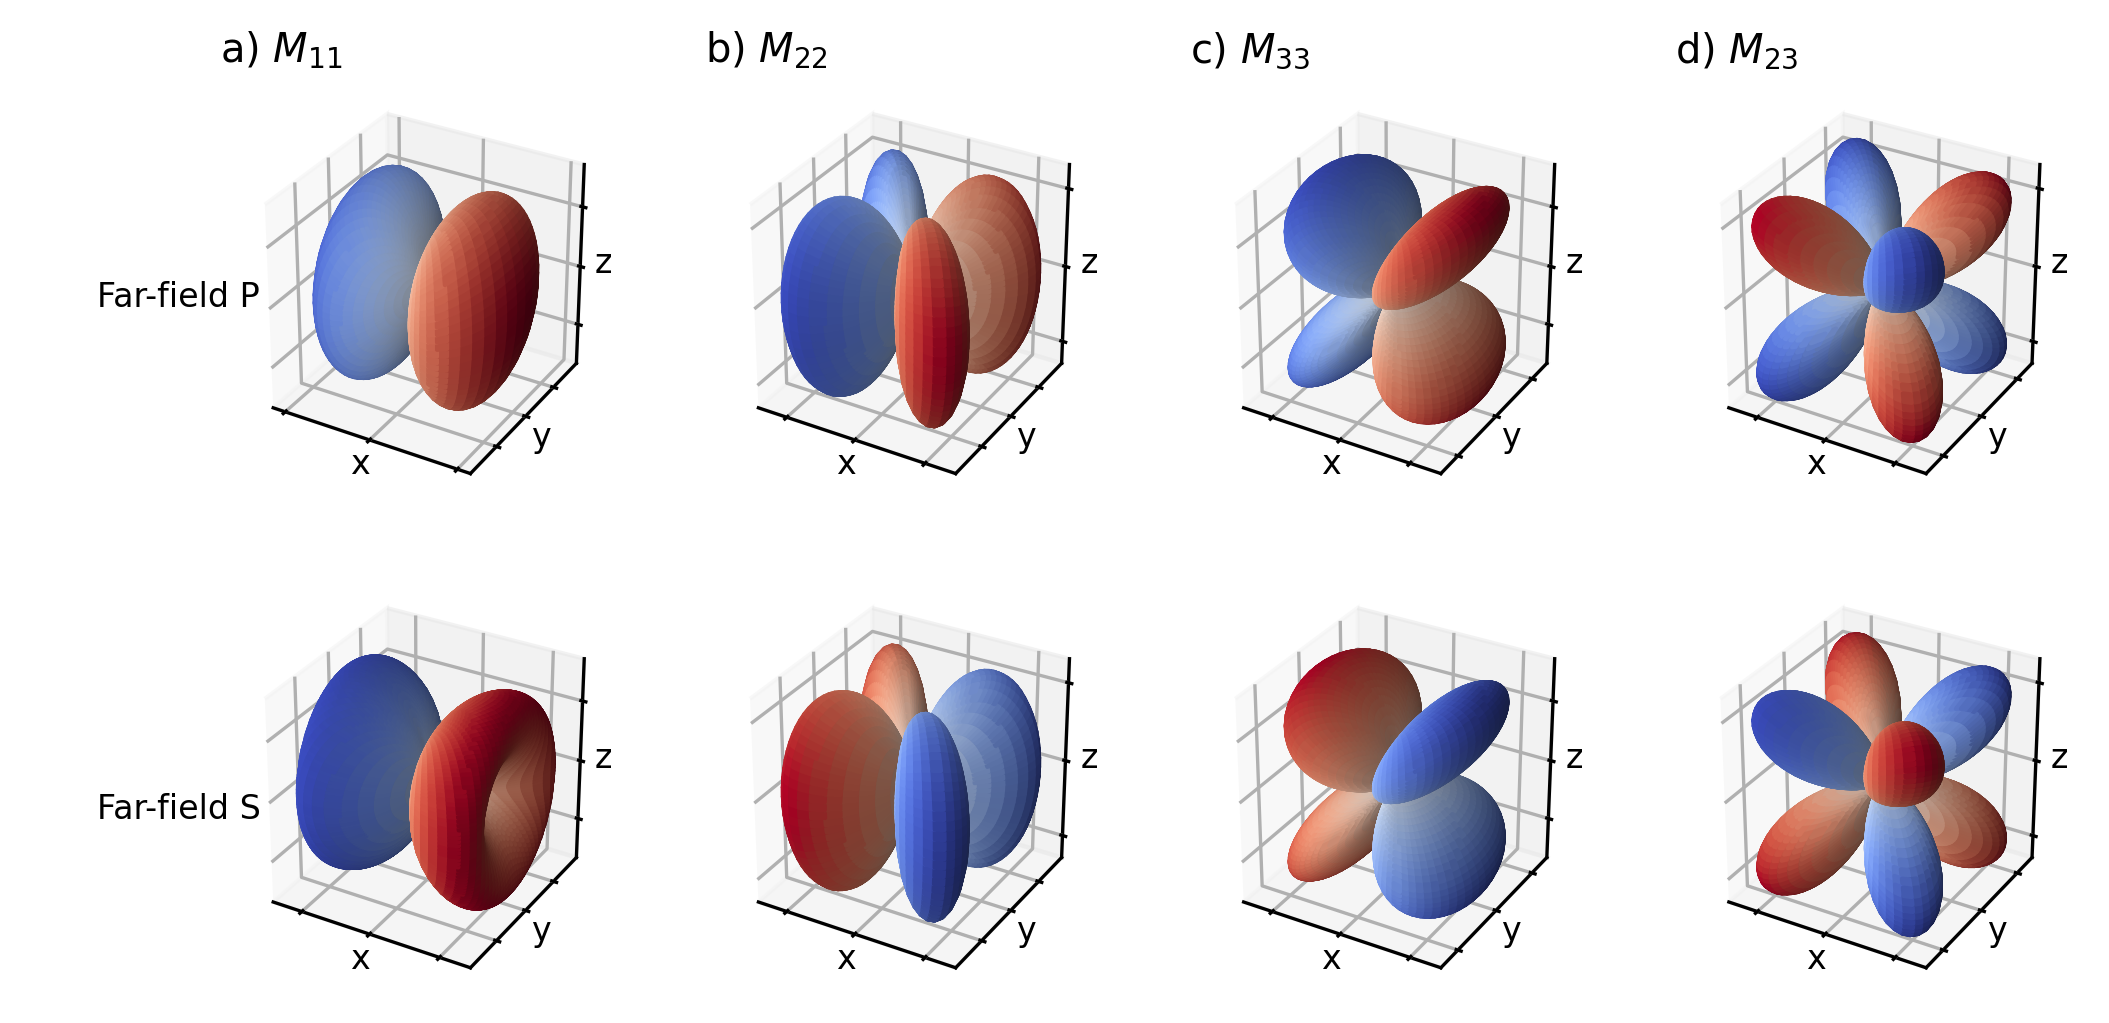

In [15]:
# Far field radiation pattern in isotropic medium
fig = plt.figure(figsize=(8,4),dpi=300)

for i in range(2):
    for j in range(4):    
        if i==0:
            data = get_rad(u_iso[j][3])
            datac = u_iso[j][3]
        else:
            data = get_rad(u_iso[j][4])
            datac = u_iso[j][4]

        plt.subplot(2,4,i*4+j+1)

        ax = fig.add_subplot(2, 4, i*4+j+1, projection='3d')
        surf1 = ax.plot_surface(data[0], data[1], data[2], alpha=1, facecolors = cm.coolwarm(0.5+0.5*datac/np.amax(np.abs(datac))), rcount=N, ccount=N)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        ax.view_init(elev=30, azim=-60)
        ax.xaxis.labelpad=-17
        ax.yaxis.labelpad=-17
        ax.zaxis.labelpad=-17

        if i==0:
            if j==0:
                ax.set_title(r"a) $M_{11}$",loc='left')
            if j==1:
                ax.set_title(r"b) $M_{22}$",loc='left')
            if j==2:
                ax.set_title(r"c) $M_{33}$",loc='left')
            if j==3:
                ax.set_title(r"d) $M_{23}$",loc='left')
            
plt.annotate("Far-field P",xy=[0.046,0.7],xycoords='figure fraction')
plt.annotate("Far-field S",xy=[0.046,0.2],xycoords='figure fraction')

plt.savefig(figpath+'radiation_pattern_iso_mt_ff.png',bbox_inches='tight',format='png')

<ipython-input-17-3648c3fdf381>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2, 4, i*4+j+1, projection='3d')


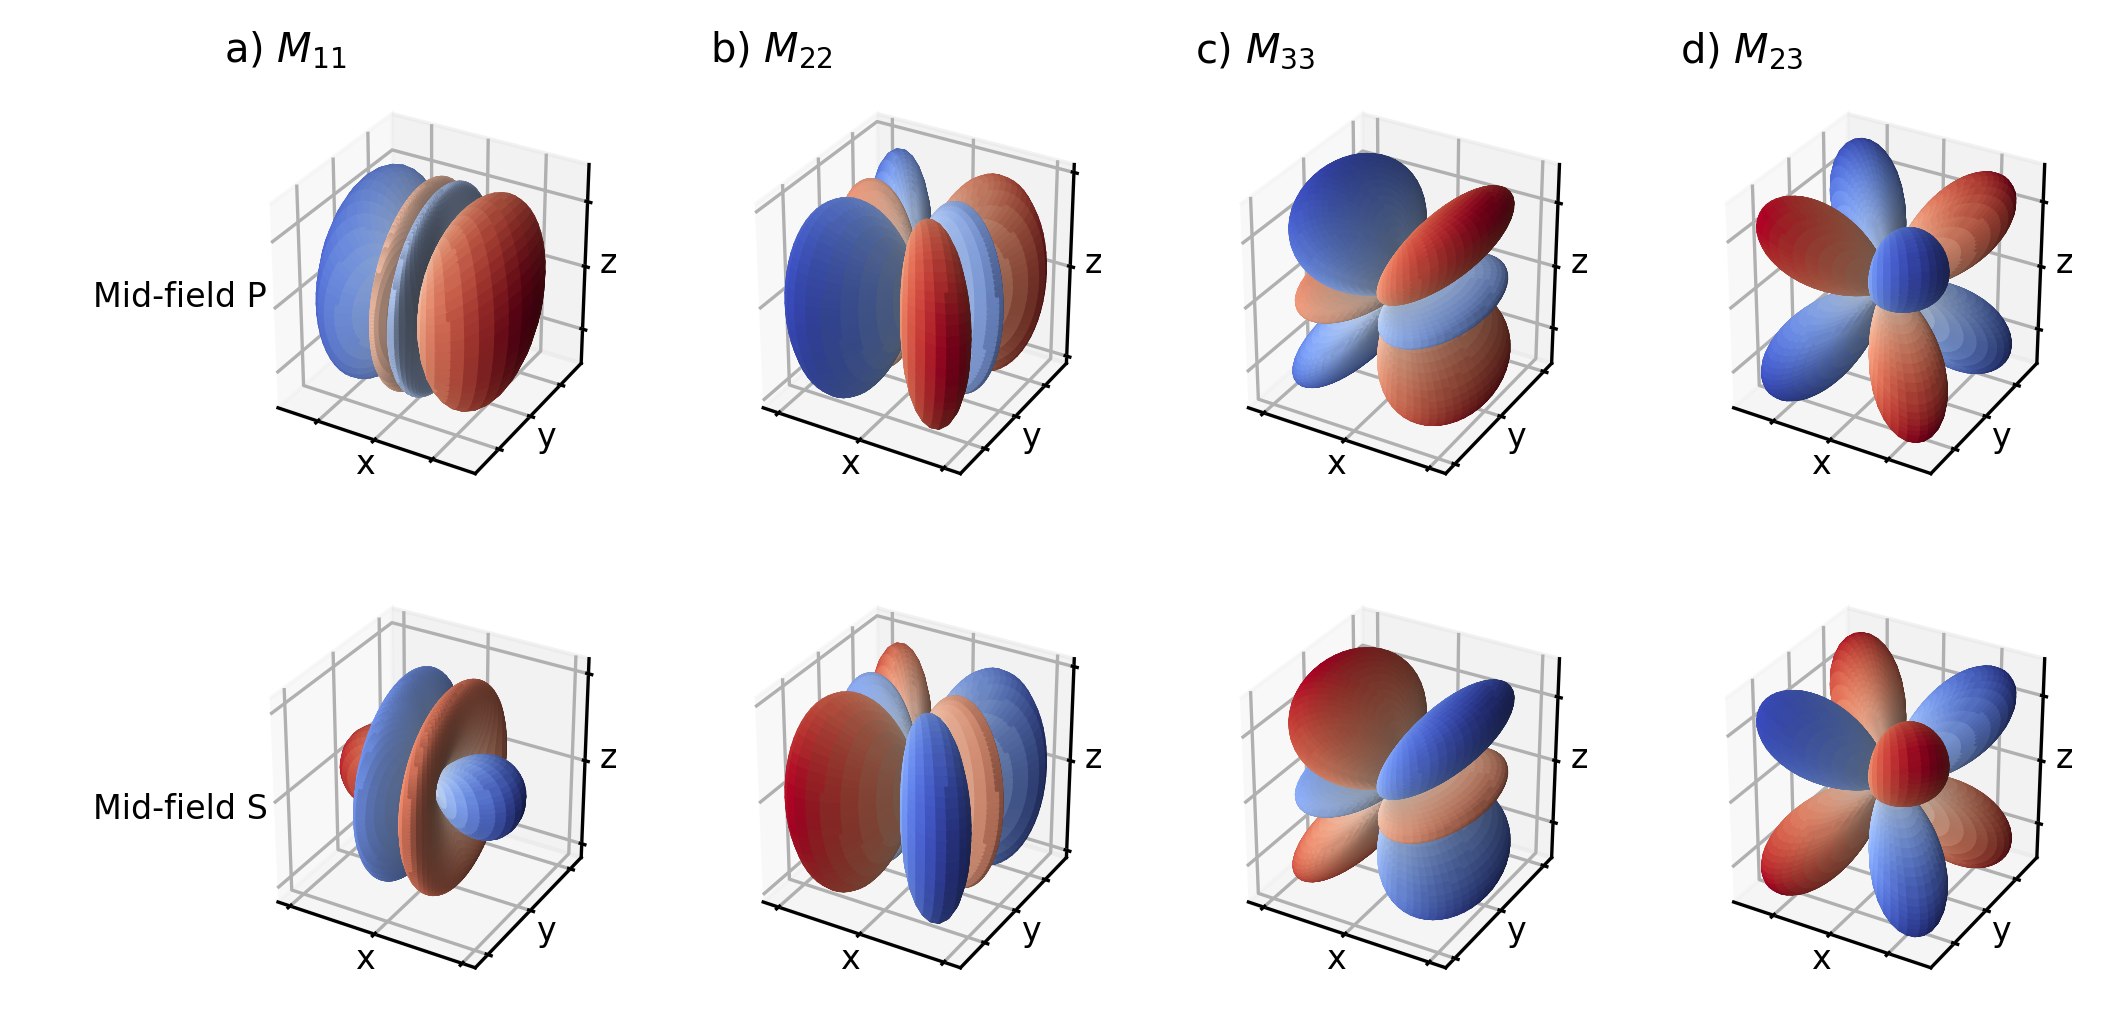

In [17]:
# Mid field radiation pattern in isotropic medium
fig = plt.figure(figsize=(8,4),dpi=300)

for i in range(2):
    for j in range(4):    
        if i==0:
            data = get_rad(u_iso[j][1])
            datac = u_iso[j][1]
        else:
            data = get_rad(u_iso[j][2])
            datac = u_iso[j][2]

        plt.subplot(2,4,i*4+j+1)

        ax = fig.add_subplot(2, 4, i*4+j+1, projection='3d')
        surf1 = ax.plot_surface(data[0], data[1], data[2], alpha=1, facecolors = cm.coolwarm(0.5+0.5*datac/np.amax(np.abs(datac))), rcount=N, ccount=N)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        ax.view_init(elev=30, azim=-60)
        ax.xaxis.labelpad=-17
        ax.yaxis.labelpad=-17
        ax.zaxis.labelpad=-17

        if i==0:
            if j==0:
                ax.set_title(r"a) $M_{11}$",loc='left')
            if j==1:
                ax.set_title(r"b) $M_{22}$",loc='left')
            if j==2:
                ax.set_title(r"c) $M_{33}$",loc='left')
            if j==3:
                ax.set_title(r"d) $M_{23}$",loc='left')

plt.annotate("Mid-field P",xy=[0.044,0.7],xycoords='figure fraction')
plt.annotate("Mid-field S",xy=[0.044,0.2],xycoords='figure fraction')

plt.savefig(figpath+'radiation_pattern_iso_mt_mf.png',bbox_inches='tight',format='png')

In [ ]:
# Far field radiation pattern in VTI type 1 medium
fig = plt.figure(figsize=(8,6),dpi=300)

for i in range(3):
    for j in range(4):    
        if i==0:
            data = get_rad(u_vti[j][6])
            datac = u_vti[j][6]
        elif i==1:
            data = get_rad(u_vti[j][7])
            datac = u_vti[j][7]
        else:
            data = get_rad(u_vti[j][8])
            datac = u_vti[j][8]
        
        datacmax = np.amax(np.abs(datac))
        datacmax = max(1e-8, datacmax)

        plt.subplot(3,4,i*4+j+1)

        ax = fig.add_subplot(3, 4, i*4+j+1, projection='3d')
        surf1 = ax.plot_surface(data[0], data[1], data[2], alpha=1, facecolors = cm.coolwarm(0.5+0.5*datac/datacmax), rcount=N, ccount=N)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        ax.view_init(elev=30, azim=-60)
        ax.xaxis.labelpad=-17
        ax.yaxis.labelpad=-17
        ax.zaxis.labelpad=-17

        if i==0:
            if j==0:
                ax.set_title(r"a) $M_{11}$",loc='left')
            if j==1:
                ax.set_title(r"b) $M_{22}$",loc='left')
            if j==2:
                ax.set_title(r"c) $M_{33}$",loc='left')
            if j==3:
                ax.set_title(r"d) $M_{23}$",loc='left')
            

plt.savefig(figpath+'radiation_pattern_vti_mt_ff.png',bbox_inches='tight',format='png')

In [ ]:
# Mid field radiation pattern in VTI type 1 medium
fig = plt.figure(figsize=(8,6),dpi=300)

for i in range(3):
    for j in range(4):    
        if i==0:
            data = get_rad(u_vti[j][3])
            datac = u_vti[j][3]
        elif i==1:
            data = get_rad(u_vti[j][4])
            datac = u_vti[j][4]
        else:
            data = get_rad(u_vti[j][5])
            datac = u_vti[j][5]
        
        datacmax = np.amax(np.abs(datac))
        datacmax = max(1e-8, datacmax)

        plt.subplot(3,4,i*4+j+1)

        ax = fig.add_subplot(3, 4, i*4+j+1, projection='3d')
        surf1 = ax.plot_surface(data[0], data[1], data[2], alpha=1, facecolors = cm.coolwarm(0.5+0.5*datac/datacmax), rcount=N, ccount=N)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        ax.view_init(elev=30, azim=-60)
        ax.xaxis.labelpad=-17
        ax.yaxis.labelpad=-17
        ax.zaxis.labelpad=-17

        if i==0:
            if j==0:
                ax.set_title(r"a) $M_{11}$",loc='left')
            if j==1:
                ax.set_title(r"b) $M_{22}$",loc='left')
            if j==2:
                ax.set_title(r"c) $M_{33}$",loc='left')
            if j==3:
                ax.set_title(r"d) $M_{23}$",loc='left')
            

plt.savefig(figpath+'radiation_pattern_vti_mt_mf.png',bbox_inches='tight',format='png')

In [ ]:
# Mid and near singularity radiation pattern in VTI type 1 medium
fig = plt.figure(figsize=(8,6),dpi=300)

for i in range(3):
    for j in range(4):    
        if i==0:
            data = get_rad(u_vti[j][0])
            datac = u_vti[j][0]
        elif i==1:
            data = get_rad(u_vti[j][1])
            datac = u_vti[j][1]
        else:
            data = get_rad(u_vti[j][2])
            datac = u_vti[j][2]
        
        datacmax = np.amax(np.abs(datac))
        datacmax = max(1e-8, datacmax)

        plt.subplot(3,4,i*4+j+1)

        ax = fig.add_subplot(3, 4, i*4+j+1, projection='3d')
        surf1 = ax.plot_surface(data[0], data[1], data[2], alpha=1, facecolors = cm.coolwarm(0.5+0.5*datac/datacmax), rcount=N, ccount=N)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        ax.view_init(elev=30, azim=-60)
        ax.xaxis.labelpad=-17
        ax.yaxis.labelpad=-17
        ax.zaxis.labelpad=-17

        if i==0:
            if j==0:
                ax.set_title(r"a) $M_{11}$",loc='left')
            if j==1:
                ax.set_title(r"b) $M_{22}$",loc='left')
            if j==2:
                ax.set_title(r"c) $M_{33}$",loc='left')
            if j==3:
                ax.set_title(r"d) $M_{23}$",loc='left')
            

plt.savefig(figpath+'radiation_pattern_vti_mt_ns_ms.png',bbox_inches='tight',format='png')
print("First row is near singularity, second row is for tau2 term, third row is for tau3 term")

### Model data in a homogeneous VTI medium to illustrate the observation on field data

In [4]:
# source parameters
nt=401 # number of time samples
dt=0.001 # sampling rate (sec)
f0=50. # peak frequency (Hz)
shift=30 # shift wavelet (number of samples)

# model parameters
alpha=2800. # P-wave velocity (m/sec)
beta=1700. # S-wave velocity (m/sec)
rho=2300. # density (kg/m3)
epsilon=0.65 # anisotropy
delta=epsilon/2
gamma=0.5 # anisotropy

# source wavelet
w=np.zeros(nt)
pi = math.pi
tshift=shift*dt
sig=math.sqrt(2)/(2*f0*pi)
t=np.linspace(0,(nt-1)*dt,nt)
w=(1.0 - ((t-tshift)/sig)**2)*np.exp( -0.5*((t-tshift)/sig)**2)

# elastic model
nx=401
ny=251
nz=251

model_vti=np.zeros((6,ny,nx,nz))
model_vti[0,:,:,:]=alpha/1000. # Vp in km/s
model_vti[1,:,:,:]=beta/1000. # Vs in km/s
model_vti[2,:,:,:]=rho/1000. # Density in g/cc
model_vti[3,:,:,:]=delta # Thomsen delta
model_vti[4,:,:,:]=epsilon # Thomsen epsilon
model_vti[5,:,:,:]=gamma # Thomsen gamma

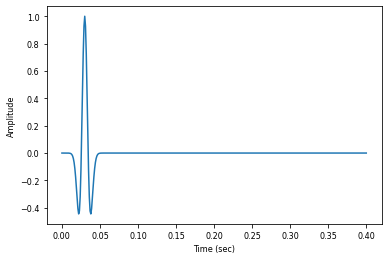

In [19]:
plt.plot(t,w)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.show()

In [7]:
# save wavelet and model to SEPlib
sep.write_file(datapath+"source.H", np.transpose(w), ds=np.array([dt]), os=np.array([0]), dpath=datapath)
sep.write_file(datapath+"model_vti.H", np.transpose(model_vti), ds=np.array([0.002,0.002,0.002,1]), os=np.array([0,0,0,0]), dpath=datapath)
sep.write_file(datapath+"model_vti_2d.H", np.transpose(model_vti[0:5,0,:,:]), ds=np.array([0.002,0.002,1]), os=np.array([0,0,0]), dpath=datapath)

In [ ]:
# run 3D numerical modeling with VTI model and moment tensor source
!${PWD}/../../../code/local/bin/WE_MODELING_3D.x source=../dat/source.H model=../dat/model_vti.H output=../dat/data_vti_mxx.H datapath=${PWD}/../dat/ \
verbose=0 mt=1 mxx=1 myy=0 mzz=0 mxy=0 mxz=0 myz=0 \
ns=1 sx0=0.2 sy0=0.25 sz0=0.25 nr=1 rx0=0.6 ry0=0.25 rz0=0.25 seismotype=0 \
bc_top=2 bc_bottom=2 bc_left=2 bc_right=2 bc_front=2 bc_back=2 taper_top=50 taper_bottom=50 taper_left=50 taper_right=50 taper_front=50 taper_back=50 taper_strength=0.1

In [ ]:
# run 3D numerical modeling with VTI model and moment tensor source
!${PWD}/../../../code/local/bin/WE_MODELING_3D.x source=../dat/source.H model=../dat/model_vti.H output=../dat/data_vti_myy.H datapath=${PWD}/../dat/ \
verbose=0 mt=1 mxx=0 myy=1 mzz=0 mxy=0 mxz=0 myz=0 \
ns=1 sx0=0.2 sy0=0.25 sz0=0.25 nr=1 rx0=0.6 ry0=0.25 rz0=0.25 seismotype=0 \
bc_top=2 bc_bottom=2 bc_left=2 bc_right=2 bc_front=2 bc_back=2 taper_top=50 taper_bottom=50 taper_left=50 taper_right=50 taper_front=50 taper_back=50 taper_strength=0.1

In [ ]:
# run 3D numerical modeling with VTI model and moment tensor source
!${PWD}/../../../code/local/bin/WE_MODELING_3D.x source=../dat/source.H model=../dat/model_vti.H output=../dat/data_vti_mzz.H datapath=${PWD}/../dat/ \
verbose=0 mt=1 mxx=0 myy=0 mzz=1 mxy=0 mxz=0 myz=0 \
ns=1 sx0=0.2 sy0=0.25 sz0=0.25 nr=1 rx0=0.6 ry0=0.25 rz0=0.25 seismotype=0 \
bc_top=2 bc_bottom=2 bc_left=2 bc_right=2 bc_front=2 bc_back=2 taper_top=50 taper_bottom=50 taper_left=50 taper_right=50 taper_front=50 taper_back=50 taper_strength=0.1

In [ ]:
# run 3D numerical modeling with VTI model and moment tensor source
!${PWD}/../../../code/local/bin/WE_MODELING_3D.x source=../dat/source.H model=../dat/model_vti.H output=../dat/data_vti_myz.H datapath=${PWD}/../dat/ \
verbose=0 mt=1 mxx=0 myy=0 mzz=0 mxy=0 mxz=0 myz=1 \
ns=1 sx0=0.2 sy0=0.25 sz0=0.25 nr=1 rx0=0.6 ry0=0.25 rz0=0.25 seismotype=0 \
bc_top=2 bc_bottom=2 bc_left=2 bc_right=2 bc_front=2 bc_back=2 taper_top=50 taper_bottom=50 taper_left=50 taper_right=50 taper_front=50 taper_back=50 taper_strength=0.1

In [8]:
# run 2D numerical modeling with VTI model and moment tensor source
!${PWD}/../../../code/local_gpu/bin/WE_MODELING.x source=../dat/source.H model=../dat/model_vti_2d.H output=../dat/data_vti2d_mxx.H datapath=${PWD}/../dat/ \
verbose=0 mt=1 mxx=1 myy=0 mzz=0 mxy=0 mxz=0 myz=0 \
ns=1 sx0=0.2 sy0=0.25 sz0=0.25 nr=1 rx0=0.6 ry0=0.25 rz0=0.25 seismotype=0 \
bc_top=2 bc_bottom=2 bc_left=2 bc_right=2 bc_front=2 bc_back=2 taper_top=50 taper_bottom=50 taper_left=50 taper_right=50 taper_front=50 taper_back=50 taper_strength=0.05

--------------------------------------------------------------------------
[[18011,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: vision

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------

Size of MPI communicator = 1 ; current rank = 0


In [9]:
# run 2D numerical modeling with VTI model and moment tensor source
!${PWD}/../../../code/local_gpu/bin/WE_MODELING.x source=../dat/source.H model=../dat/model_vti_2d.H output=../dat/data_vti2d_mzz.H datapath=${PWD}/../dat/ \
verbose=0 mt=1 mxx=0 myy=0 mzz=1 mxy=0 mxz=0 myz=0 \
ns=1 sx0=0.2 sy0=0.25 sz0=0.25 nr=1 rx0=0.6 ry0=0.25 rz0=0.25 seismotype=0 \
bc_top=2 bc_bottom=2 bc_left=2 bc_right=2 bc_front=2 bc_back=2 taper_top=50 taper_bottom=50 taper_left=50 taper_right=50 taper_front=50 taper_back=50 taper_strength=0.05

--------------------------------------------------------------------------
[[17849,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: vision

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------

Size of MPI communicator = 1 ; current rank = 0


In [5]:
# load numerical solutions
axes, data = sep.read_file(datapath+"data_vti_mxx.H")
data_vti_mxx = data.reshape(axes.n,order='F').T

axes, data = sep.read_file(datapath+"data_vti_myy.H")
data_vti_myy = data.reshape(axes.n,order='F').T

axes, data = sep.read_file(datapath+"data_vti_mzz.H")
data_vti_mzz = data.reshape(axes.n,order='F').T

axes, data = sep.read_file(datapath+"data_vti_myz.H")
data_vti_myz = data.reshape(axes.n,order='F').T

axes, data = sep.read_file(datapath+"data_vti2d_mxx.H")
data_vti2d_mxx = data.reshape(axes.n,order='F').T
data_vti2d_mxx = np.squeeze(data_vti2d_mxx)

axes, data = sep.read_file(datapath+"data_vti2d_mzz.H")
data_vti2d_mzz = data.reshape(axes.n,order='F').T
data_vti2d_mzz = np.squeeze(data_vti2d_mzz)

# scale to get the proper physical units
data_vti_mxx *= 1e-15
data_vti_myy *= 1e-15
data_vti_mzz *= 1e-15
data_vti_myz *= 1e-15

data_vti2d_mxx *= 1e-15
data_vti2d_mzz *= 1e-15

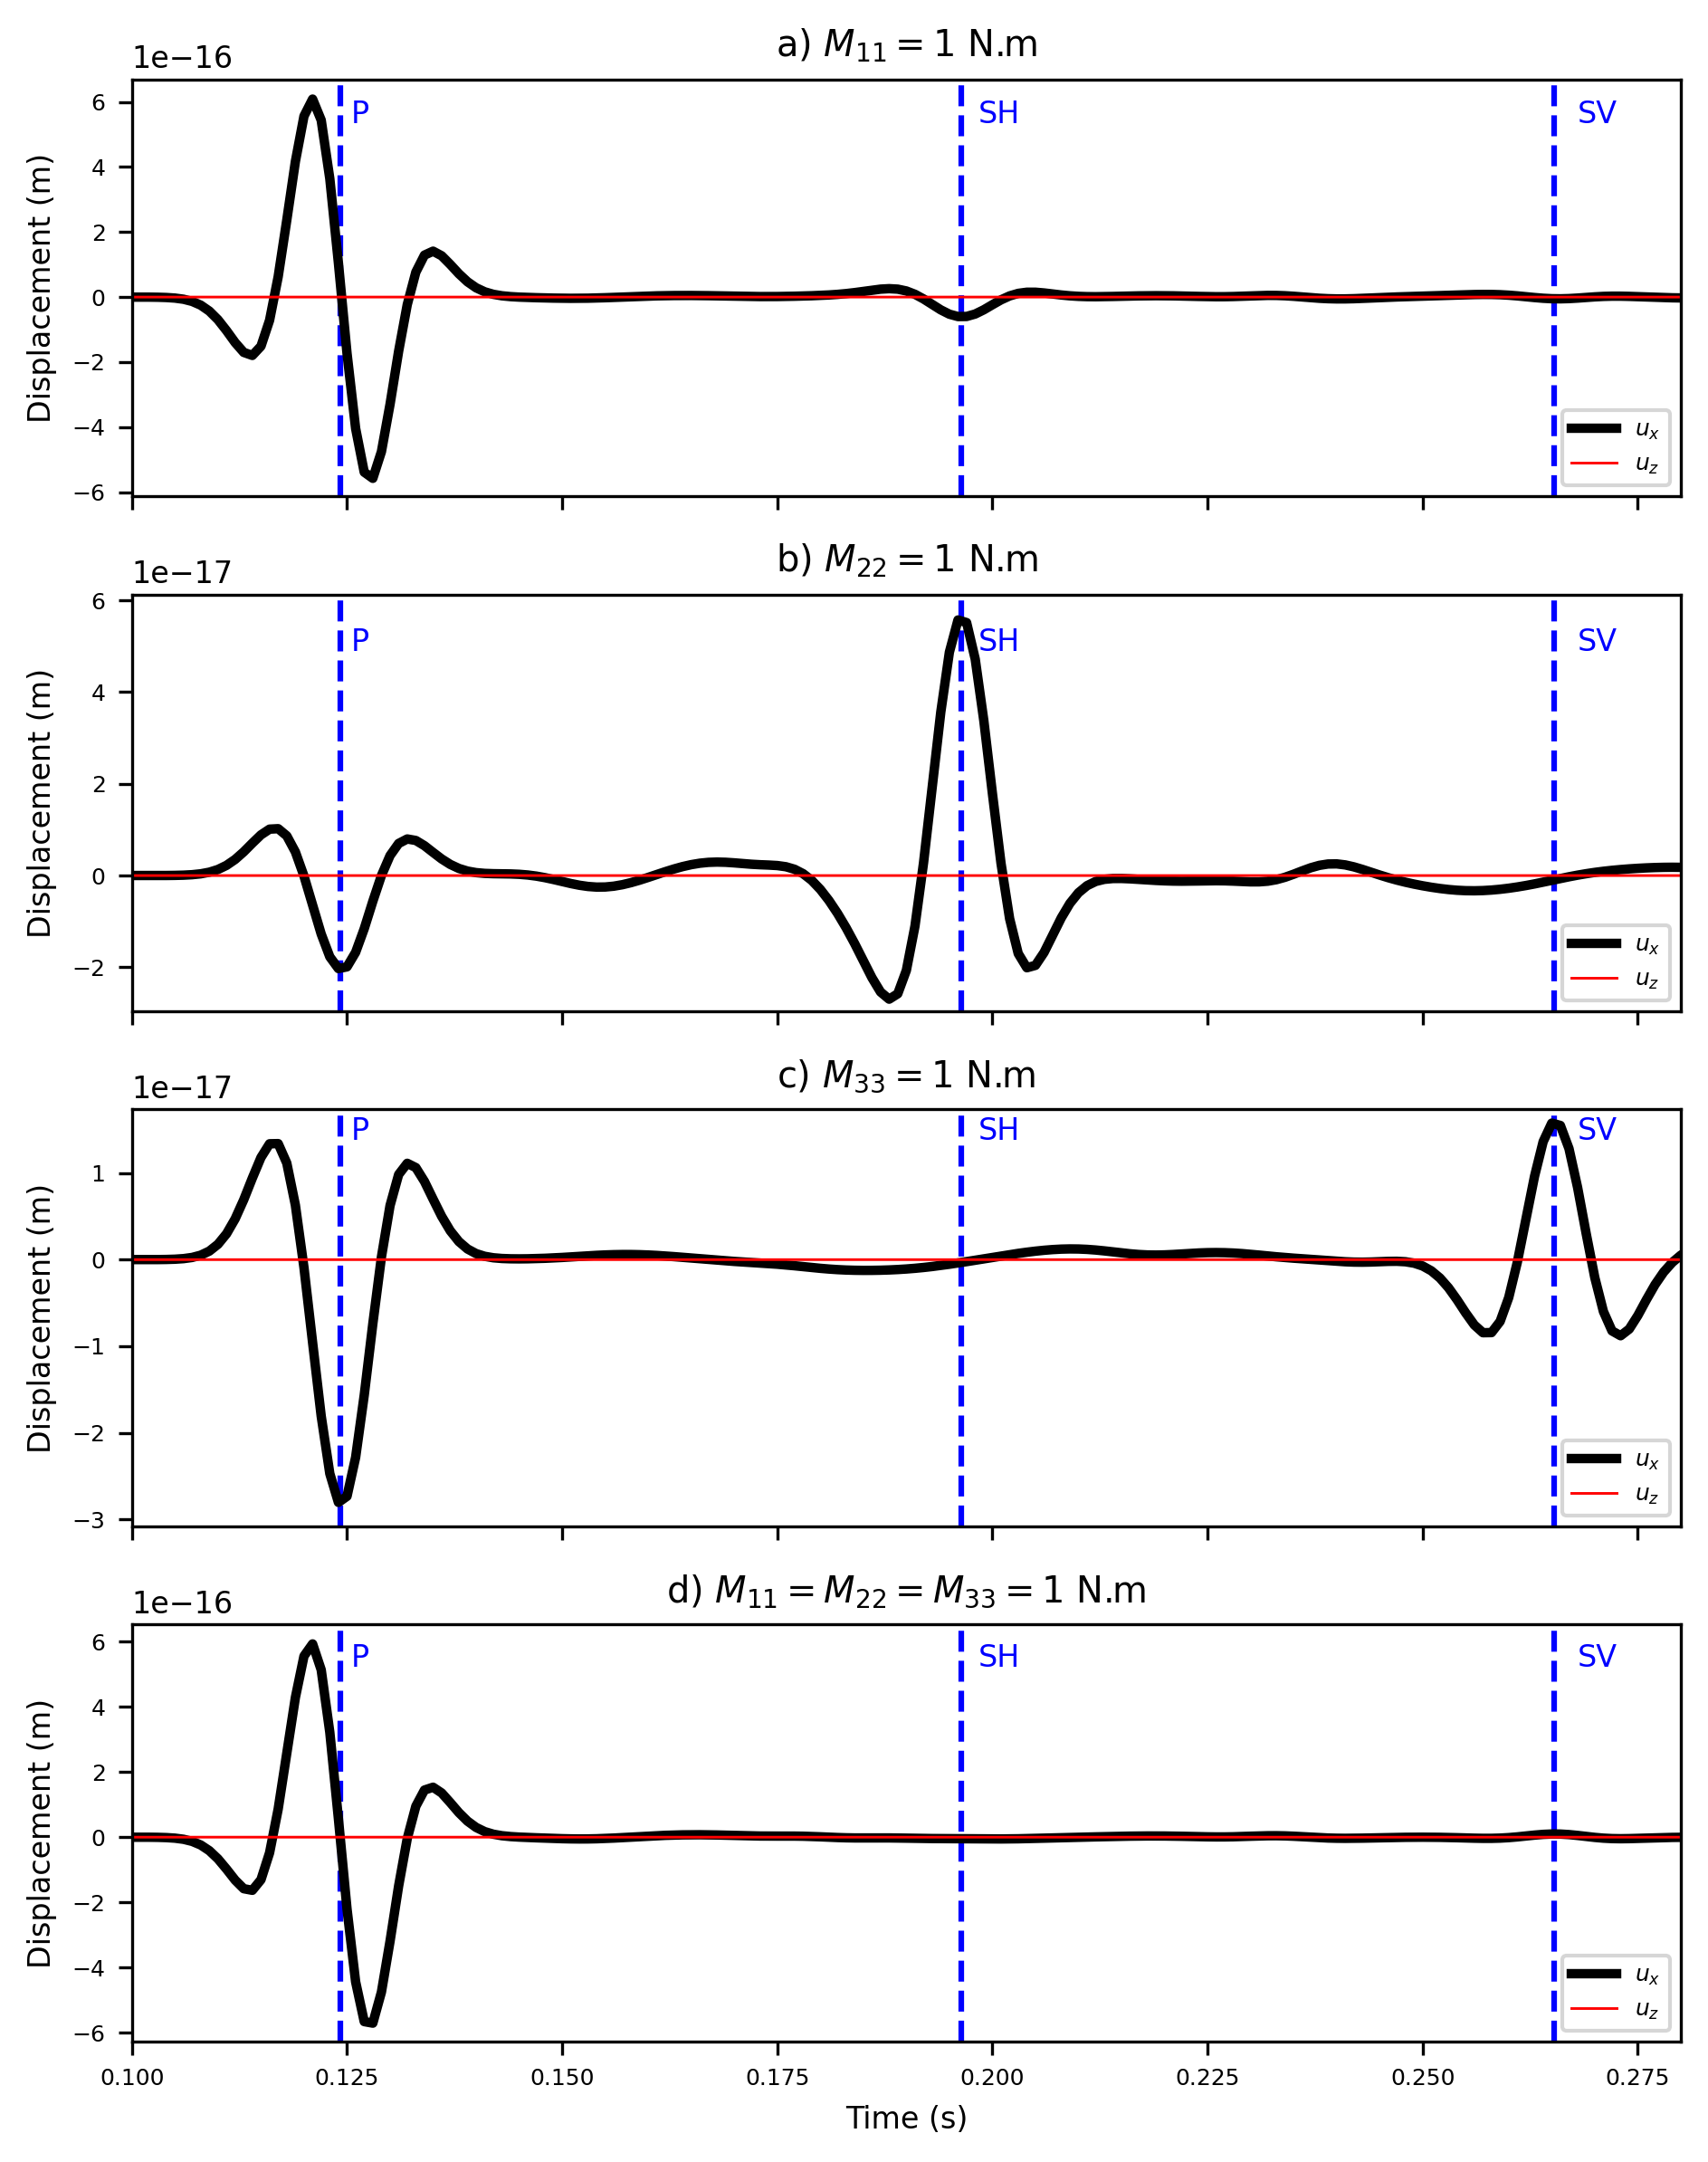

In [6]:
# plot ux seismograms with arrival times

tp = shift*dt + 400.0/(alpha*math.sqrt(1+2*epsilon))
tsh = shift*dt + 400.0/(beta*math.sqrt(1+2*gamma))
tsv = shift*dt + 400.0/beta

tmin = 0.1
tmax = 0.28

rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'

fig=plt.figure(figsize=(6.33, 8),dpi=300)


plt.subplot(4,1,1)

ymin=1.1*np.min(data_vti_mxx[0])
ymax=1.1*np.max(data_vti_mxx[0])
plt.plot(t,data_vti_mxx[0],linewidth=2.5,c='k',label=r"$u_x$")
plt.plot(t,data_vti_mxx[2],linewidth=0.7,c='r',label=r"$u_z$")
# plt.plot(t,data_vti_myy[0],linewidth=2.0,c='r',label=r"$w \ast \partial_2 G_{12}$")
# plt.plot(t,data_vti_mzz[0],linewidth=2.0,c='b',label=r"$w \ast \partial_3 G_{13}$")
# plt.plot(t,data_vti_myz[0],linewidth=2.0,c='g',label=r"$w \ast \partial_2 G_{13}$")
plt.vlines([tp,tsh,tsv],ymin=ymin,ymax=ymax,linestyles='--',colors='b')
# plt.xlim([0,t[nt-1]])
plt.xlim([tmin,tmax])
plt.ylim([ymin,ymax])
plt.gca().set_xticklabels([])
plt.ylabel(r"Displacement (m)")
plt.title(r"a) $M_{11} = 1$ N.m",loc='center')
plt.legend(loc='lower right',prop={'size': 6})
plt.gca().tick_params(axis='both', which='major', labelsize=6)
plt.annotate("P",xy=[1.01*tp,0.8*ymax],color='b')
plt.annotate("SH",xy=[1.01*tsh,0.8*ymax],color='b')
plt.annotate("SV",xy=[1.01*tsv,0.8*ymax],color='b')

plt.subplot(4,1,2)

ymin=1.1*np.min(data_vti_myy[0])
ymax=1.1*np.max(data_vti_myy[0])
plt.plot(t,data_vti_myy[0],linewidth=2.5,c='k',label=r"$u_x$")
plt.plot(t,data_vti_myy[2],linewidth=0.7,c='r',label=r"$u_z$")
plt.vlines([tp,tsh,tsv],ymin=ymin,ymax=ymax,linestyles='--',colors='b')
plt.xlim([tmin,tmax])
plt.ylim([ymin,ymax])
plt.gca().set_xticklabels([])
plt.ylabel(r"Displacement (m)")
plt.title(r"b) $M_{22} = 1$ N.m",loc='center')
plt.legend(loc='lower right',prop={'size': 6})
plt.gca().tick_params(axis='both', which='major', labelsize=6)
plt.annotate("P",xy=[1.01*tp,0.8*ymax],color='b')
plt.annotate("SH",xy=[1.01*tsh,0.8*ymax],color='b')
plt.annotate("SV",xy=[1.01*tsv,0.8*ymax],color='b')

plt.subplot(4,1,3)

ymin=1.1*np.min(data_vti_mzz[0])
ymax=1.1*np.max(data_vti_mzz[0])
plt.plot(t,data_vti_mzz[0],linewidth=2.5,c='k',label=r"$u_x$")
plt.plot(t,data_vti_mzz[2],linewidth=0.7,c='r',label=r"$u_z$")
plt.vlines([tp,tsh,tsv],ymin=ymin,ymax=ymax,linestyles='--',colors='b')
plt.xlim([tmin,tmax])
plt.ylim([ymin,ymax])
plt.gca().set_xticklabels([])
plt.ylabel(r"Displacement (m)")
plt.title(r"c) $M_{33} = 1$ N.m",loc='center')
plt.legend(loc='lower right',prop={'size': 6})
plt.gca().tick_params(axis='both', which='major', labelsize=6)
plt.annotate("P",xy=[1.01*tp,0.8*ymax],color='b')
plt.annotate("SH",xy=[1.01*tsh,0.8*ymax],color='b')
plt.annotate("SV",xy=[1.01*tsv,0.8*ymax],color='b')

plt.subplot(4,1,4)

ymin=1.1*np.min(data_vti_mxx[0]+data_vti_myy[0]+data_vti_mzz[0])
ymax=1.1*np.max(data_vti_mxx[0]+data_vti_myy[0]+data_vti_mzz[0])
plt.plot(t,data_vti_mxx[0]+data_vti_myy[0]+data_vti_mzz[0],linewidth=2.5,c='k',label=r"$u_x$")
plt.plot(t,data_vti_mxx[2]+data_vti_myy[2]+data_vti_mzz[2],linewidth=0.7,c='r',label=r"$u_z$")
plt.vlines([tp,tsh,tsv],ymin=ymin,ymax=ymax,linestyles='--',colors='b')
plt.xlim([tmin,tmax])
plt.ylim([ymin,ymax])
# plt.gca().set_xticklabels([])
plt.xlabel("Time (s)")
plt.ylabel(r"Displacement (m)")
plt.title(r"d) $M_{11}=M_{22}=M_{33} = 1$ N.m",loc='center')
plt.legend(loc='lower right',prop={'size': 6})
plt.gca().tick_params(axis='both', which='major', labelsize=6)
plt.annotate("P",xy=[1.01*tp,0.8*ymax],color='b')
plt.annotate("SH",xy=[1.01*tsh,0.8*ymax],color='b')
plt.annotate("SV",xy=[1.01*tsv,0.8*ymax],color='b')

# plt.subplot(4,1,4)

# ymin=1.1*np.min(data_vti_myz[0])
# ymax=1.1*np.max(data_vti_myz[0])
# plt.plot(t,data_vti_myz[0],linewidth=2.5,c='k',label=r"$w \ast \partial_2 G_{13}$")
# plt.plot(t,data_vti_myz[2],linewidth=0.7,c='r',label=r"$w \ast \partial_2 G_{33}$")
# plt.vlines([tp,tsh,tsv],ymin=ymin,ymax=ymax,linestyles='--',colors='b')
# plt.xlim([tmin,tmax])
# plt.ylim([ymin,ymax])
# plt.xlabel("Time (s)")
# plt.ylabel(r"Displacement (m)")
# plt.title(r"d) $M_{23} \neq 0$",loc='center')
# plt.legend(loc='lower right',prop={'size': 6})
# plt.gca().tick_params(axis='both', which='major', labelsize=6)

plt.tight_layout()

plt.savefig(figpath+'seismograms_vti.png',bbox_inches='tight',format='png')

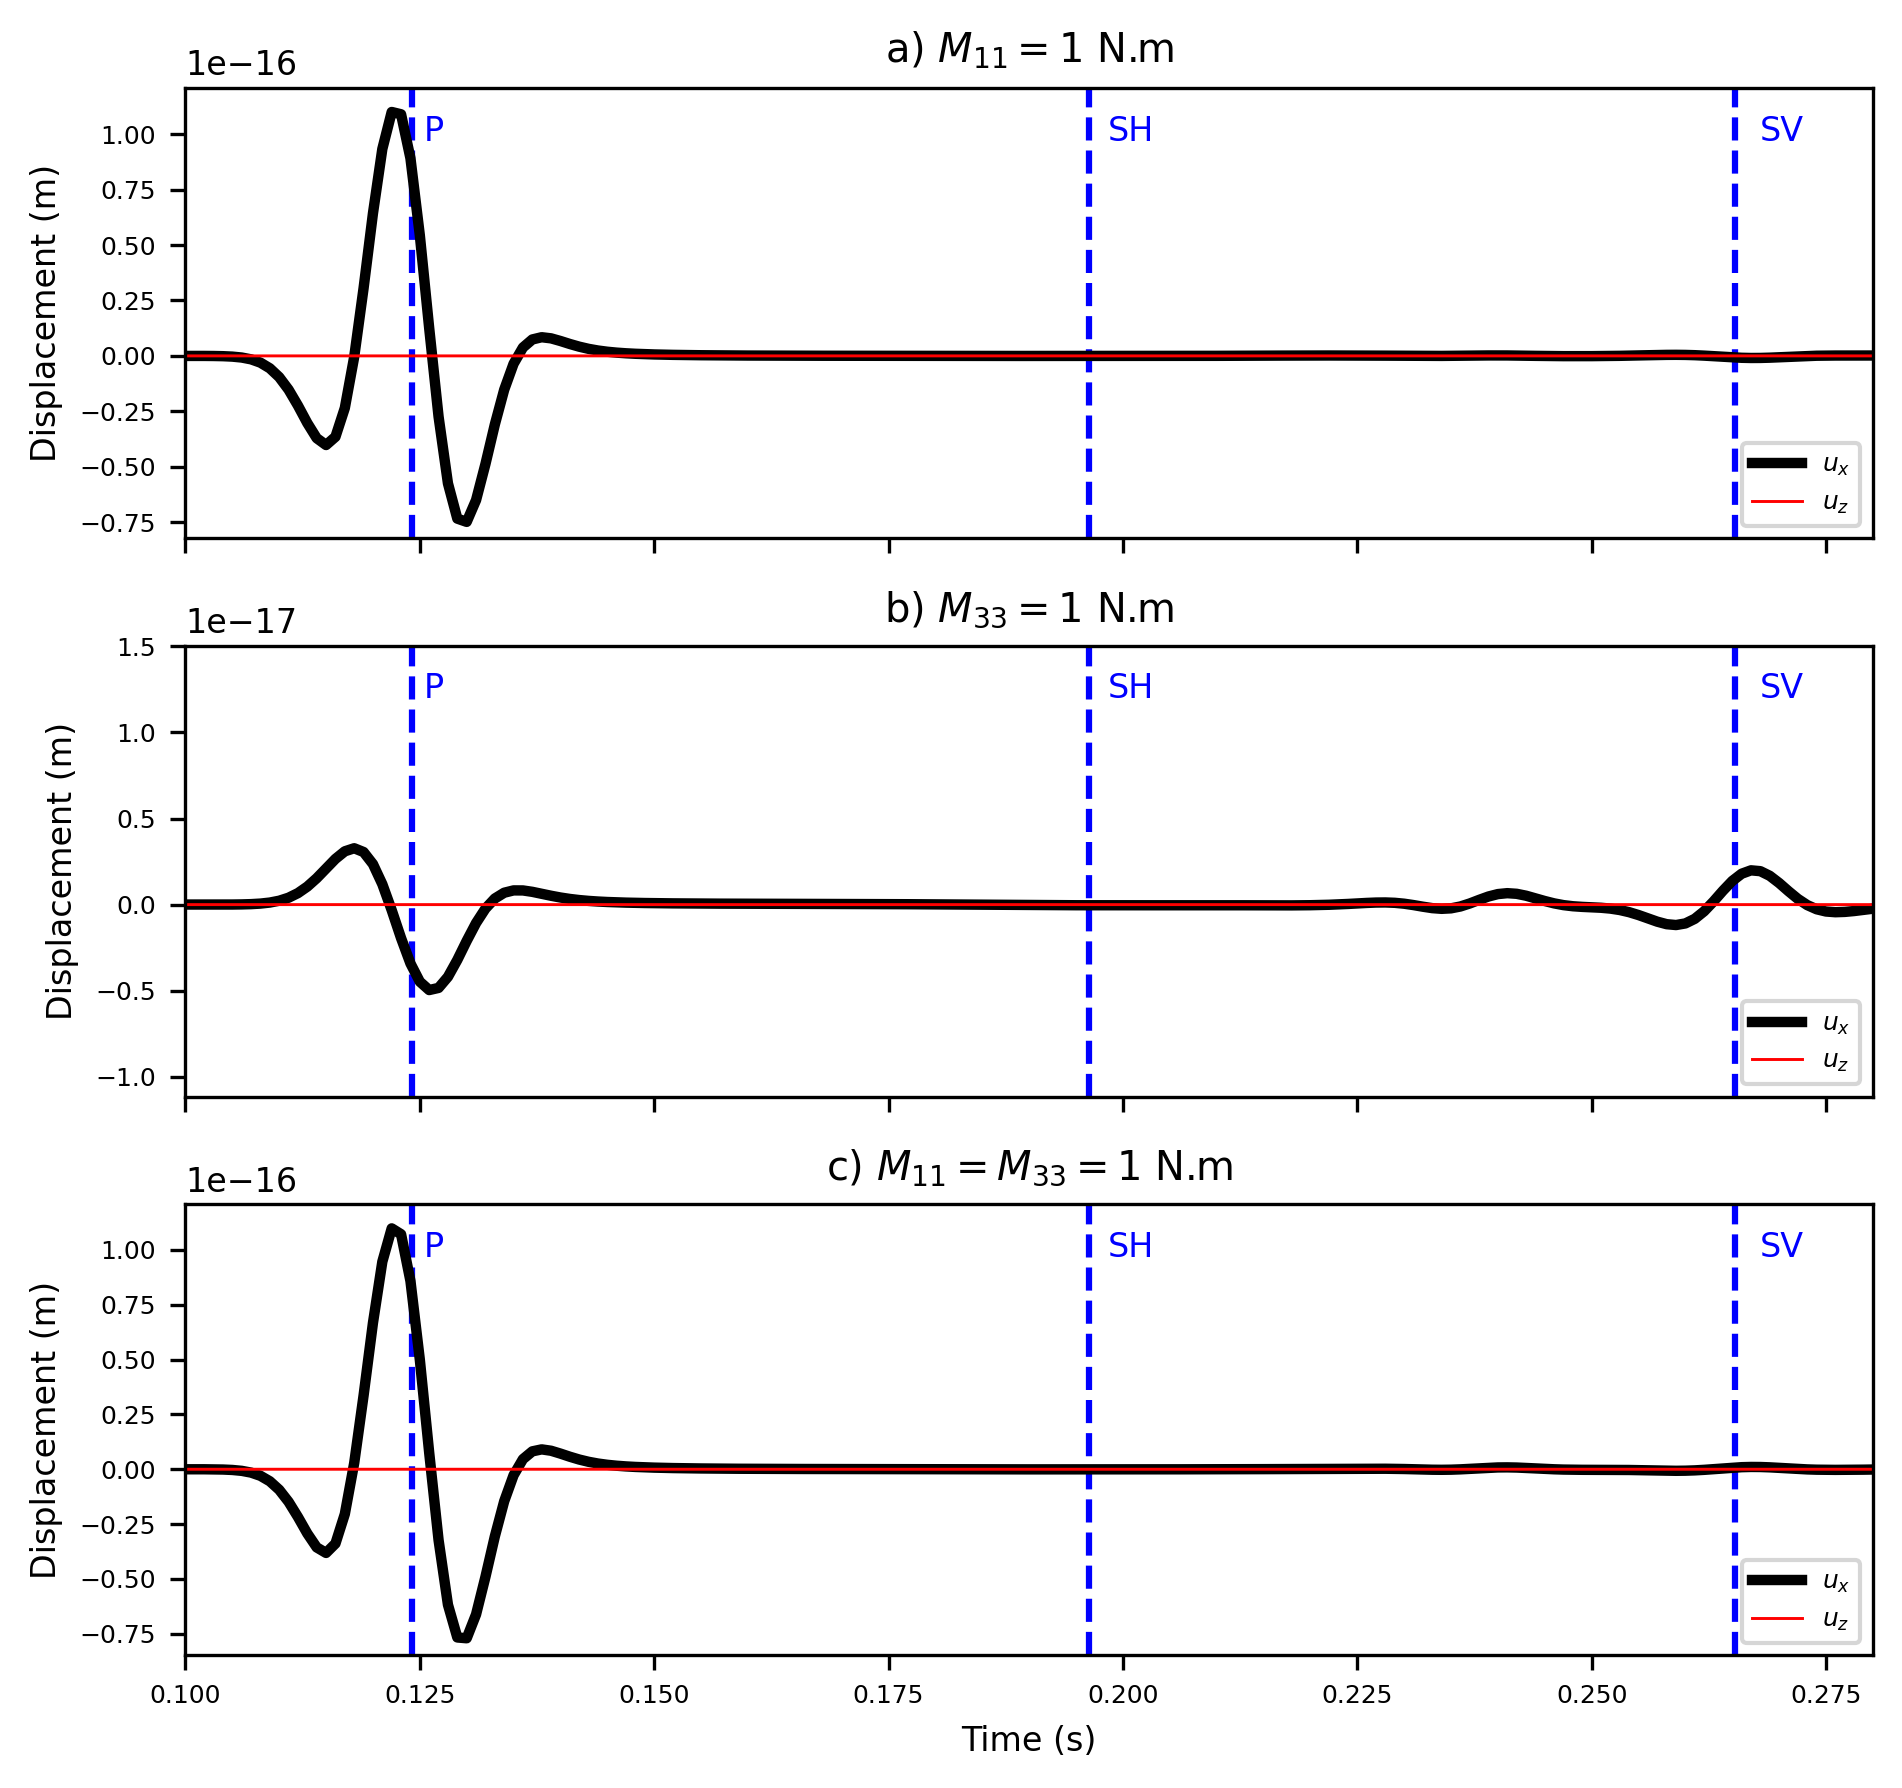

In [7]:
# plot ux seismograms with arrival times

tp = shift*dt + 400.0/(alpha*math.sqrt(1+2*epsilon))
tsh = shift*dt + 400.0/(beta*math.sqrt(1+2*gamma))
tsv = shift*dt + 400.0/beta

tmin = 0.1
tmax = 0.28

rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'

fig=plt.figure(figsize=(6.33, 6),dpi=300)


plt.subplot(3,1,1)

ymin=1.1*np.min(data_vti2d_mxx[0])
ymax=1.1*np.max(data_vti2d_mxx[0])
plt.plot(t,data_vti2d_mxx[0],linewidth=2.5,c='k',label=r"$u_x$")
plt.plot(t,data_vti2d_mxx[1],linewidth=0.7,c='r',label=r"$u_z$")
plt.vlines([tp,tsh,tsv],ymin=ymin,ymax=ymax,linestyles='--',colors='b')
# plt.xlim([0,t[nt-1]])
plt.xlim([tmin,tmax])
plt.ylim([ymin,ymax])
plt.gca().set_xticklabels([])
plt.ylabel(r"Displacement (m)")
plt.title(r"a) $M_{11} = 1$ N.m",loc='center')
plt.legend(loc='lower right',prop={'size': 6})
plt.gca().tick_params(axis='both', which='major', labelsize=6)
plt.annotate("P",xy=[1.01*tp,0.8*ymax],color='b')
plt.annotate("SH",xy=[1.01*tsh,0.8*ymax],color='b')
plt.annotate("SV",xy=[1.01*tsv,0.8*ymax],color='b')

plt.subplot(3,1,2)

ymin=1.1*np.min(data_vti2d_mzz[0])
ymax=1.1*np.max(data_vti2d_mzz[0])
plt.plot(t,data_vti2d_mzz[0],linewidth=2.5,c='k',label=r"$u_x$")
plt.plot(t,data_vti2d_mzz[1],linewidth=0.7,c='r',label=r"$u_z$")
plt.vlines([tp,tsh,tsv],ymin=ymin,ymax=ymax,linestyles='--',colors='b')
plt.xlim([tmin,tmax])
plt.ylim([ymin,ymax])
plt.gca().set_xticklabels([])
plt.ylabel(r"Displacement (m)")
plt.title(r"b) $M_{33} = 1$ N.m",loc='center')
plt.legend(loc='lower right',prop={'size': 6})
plt.gca().tick_params(axis='both', which='major', labelsize=6)
plt.annotate("P",xy=[1.01*tp,0.8*ymax],color='b')
plt.annotate("SH",xy=[1.01*tsh,0.8*ymax],color='b')
plt.annotate("SV",xy=[1.01*tsv,0.8*ymax],color='b')

plt.subplot(3,1,3)

ymin=1.1*np.min(data_vti2d_mxx[0]+data_vti2d_mzz[0])
ymax=1.1*np.max(data_vti2d_mxx[0]+data_vti2d_mzz[0])
plt.plot(t,data_vti2d_mxx[0]+data_vti2d_mzz[0],linewidth=2.5,c='k',label=r"$u_x$")
plt.plot(t,data_vti2d_mxx[1]+data_vti2d_mzz[1],linewidth=0.7,c='r',label=r"$u_z$")
plt.vlines([tp,tsh,tsv],ymin=ymin,ymax=ymax,linestyles='--',colors='b')
plt.xlim([tmin,tmax])
plt.ylim([ymin,ymax])
# plt.gca().set_xticklabels([])
plt.xlabel("Time (s)")
plt.ylabel(r"Displacement (m)")
plt.title(r"c) $M_{11}=M_{33} = 1$ N.m",loc='center')
plt.legend(loc='lower right',prop={'size': 6})
plt.gca().tick_params(axis='both', which='major', labelsize=6)
plt.annotate("P",xy=[1.01*tp,0.8*ymax],color='b')
plt.annotate("SH",xy=[1.01*tsh,0.8*ymax],color='b')
plt.annotate("SV",xy=[1.01*tsv,0.8*ymax],color='b')

plt.tight_layout()

# plt.savefig(figpath+'seismograms_vti_2d.png',bbox_inches='tight',format='png')

In [ ]:
%matplotlib inline
comp=0

for i in range(4):
    for j in range(2):

        name="mt_rad"

        if j==0:
            data = prad[i]
            datac = up[i]
            name += "_p_m" + str(i)
        else:
            data = srad[i]
            datac = us[i]
            name += "_s_m" + str(i)

        xmax=2*np.max(np.abs(data[0][comp]))
        ymax=2*np.max(np.abs(data[1][comp]))
        zmax=2*np.max(np.abs(data[2][comp]))
        x, z = np.meshgrid(np.linspace(-xmax,xmax,n) , np.linspace(-zmax,zmax,n) )

        fig = plt.figure(figsize=(2,3),dpi=300)

        ax = fig.gca(projection='3d')
        surf1 = ax.plot_surface(data[0][comp], data[1][comp], data[2][comp], alpha=1, facecolors = cm.jet(np.abs(datac[comp])/np.amax(np.abs(datac[comp]))), rcount=n, ccount=n)
        surf2 = ax.plot_surface(x, 0, z, alpha=0.2, color='k')
        ax.set_xlim([-xmax, xmax])
        ax.set_ylim([-ymax, ymax])
        ax.set_zlim([-zmax, zmax])
        ax.view_init(elev=30, azim=-60)
        plt.axis('off')

        plt.savefig(figpath+name+".png")